Task 3: Linear Regression

--- 1. Data Loading and Preparation ---
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
----------------------------------------
Training samples: 16512, Testing samples: 4128
----------------------------------------
--- 3. Model Training ---
Linear Regression Model successfully trained.
----------------------------------------
--- 4. Model Evaluation ---
Mean Absolute Error (MAE): 0.533
Mean Squared Error (MSE): 0.556
Root Mean Squared Error (RMSE): 0.746
R-squared (R²): 0.576
----------------------------------------
--- 5. Model Interpretation and Visualization ---
Intercept (β₀): -37.023

Feature Coefficients (βᵢ):
            Coefficient
AveBedrms      0.783145
MedInc         0.448675
HouseAge       0.009724
Population    -0.000002
AveOccup      -0.003526
AveRooms      -0.123323
Latitude      -0.419792
Longitude     -0.433708


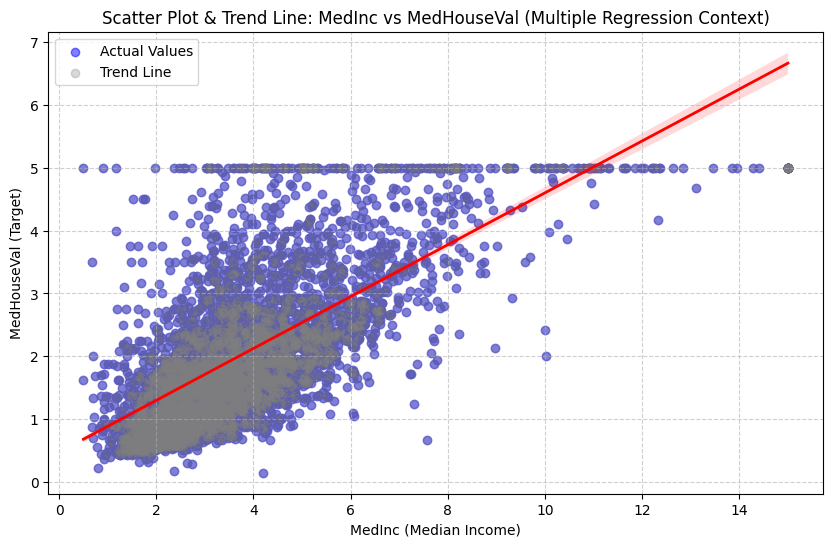

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# --- 1. Import and Preprocess the Dataset ---
print("--- 1. Data Loading and Preparation ---")

# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
X = df.drop(columns=['MedHouseVal']) # Features (Independent Variables)
y = df['MedHouseVal']               # Target (Dependent Variable - Median House Value)

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(X.columns)}")
print("-" * 40)

# --- 2. Split Data into Train-Test Sets ---
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print("-" * 40)

# --- 3. Fit a Linear Regression model ---
print("--- 3. Model Training ---")

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Linear Regression Model successfully trained.")
print("-" * 40)

# --- 4. Evaluate Model using MAE, MSE, R² ---
print("--- 4. Model Evaluation ---")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print("-" * 40)

# --- 5. Plot Regression Line and Interpret Coefficients ---
print("--- 5. Model Interpretation and Visualization ---")

# 5a. Interpret Coefficients (Remains the same)
print(f"Intercept (β₀): {model.intercept_:.3f}")

# Create a DataFrame to display feature coefficients
coefficients_df = pd.DataFrame(
    model.coef_, X.columns, columns=['Coefficient']
)
print("\nFeature Coefficients (βᵢ):")
print(coefficients_df.sort_values(by='Coefficient', ascending=False))

# 5b. Plot Regression Line (For visualization, we'll plot a single feature vs the target)
feature_to_plot = 'MedInc'

# *** FIX APPLIED HERE ***
# Comment out the line that caused the error (trying to predict with only one feature):
# X_plot = X_test[[feature_to_plot]]
# y_plot_pred = model.predict(X_plot)
# We use the full prediction 'y_pred' calculated in Step 3.

plt.figure(figsize=(10, 6))

# Scatter plot of actual values for the chosen feature
plt.scatter(
    X_test[feature_to_plot],
    y_test,
    color='blue',
    alpha=0.5,
    label='Actual Values'
)

# Plot the fitted line/trend using seaborn's regplot, which correctly handles
# visualizing the 2D relationship within a multi-dimensional context.
sns.regplot(
    x=X_test[feature_to_plot],
    y=y_test,
    scatter_kws={'alpha':0.3, 'color':'gray'},
    line_kws={'color':'red', 'linewidth':2},
    label='Trend Line'
)

plt.title(f'Scatter Plot & Trend Line: {feature_to_plot} vs MedHouseVal (Multiple Regression Context)')
plt.xlabel(f'{feature_to_plot} (Median Income)')
plt.ylabel('MedHouseVal (Target)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()